In [5]:
import dml.data as D
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn
import sklearn.metrics as M
import sklearn.neighbors as N

seaborn.set()

%matplotlib inline

In [13]:
num_train = 50000
num_valid = 5000

In [7]:
train = pd.read_json("/media/ejhumphrey/workspace/icml-dml/datasets/train.json")
valid = pd.read_json("/media/ejhumphrey/workspace/icml-dml/datasets/valid.json")
test = pd.read_json("/media/ejhumphrey/workspace/icml-dml/datasets/test.json")

In [8]:
# Instrument embedding
inst_full = pd.read_json(
    "/media/ejhumphrey/workspace/icml-dml/embeddings/"
    "instrument-000-050000-20160611_18h21m39s/output_index.json")

In [6]:
x_train, y_train = D.sample_embeddings(inst_full.loc[train.index], num_train)

In [8]:
x_valid, y_valid = D.sample_embeddings(inst_full.loc[valid.index], num_valid)

In [59]:
knn_inst = N.KNeighborsClassifier(75).fit(x_train, y_train.instrument)
num_inst_classes = len(knn_inst.classes_)

In [10]:
print("Train: {:.4f}\tValid: {:.4f}".format(
        knn_inst.score(x_train, y_train.instrument),
        knn_inst.score(x_valid, y_valid.instrument)))

Train: 0.4803	Valid: 0.4506


In [39]:
train_confmat = M.confusion_matrix(y_train.instrument, knn_inst.predict(x_train))
norm = 1.*train_confmat.sum(axis=0, keepdims=True)
norm[norm == 0] = 1.0

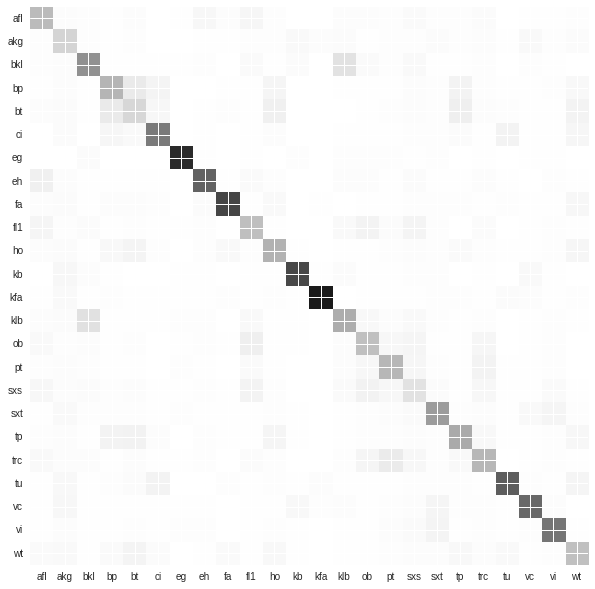

In [60]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(train_confmat / norm, vmin=0, vmax=1.0, 
          aspect='equal', interpolation='nearest')
ax.set_yticks(range(num_inst_classes))
ax.set_yticklabels(knn_inst.classes_)
ax.set_xticks(range(num_inst_classes))
ax.set_xticklabels(knn_inst.classes_);

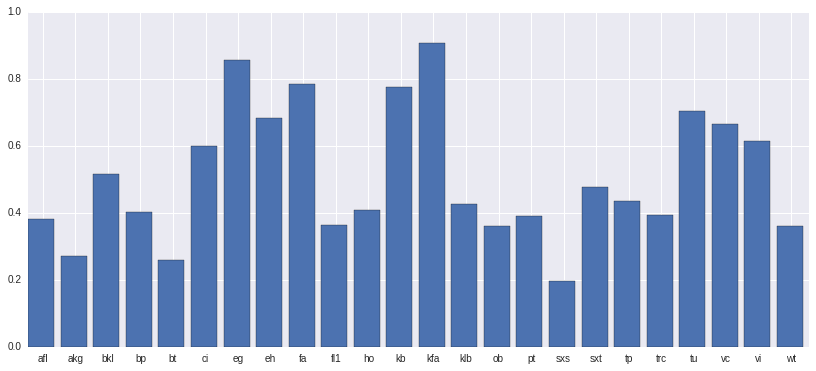

In [68]:
fig, ax = plt.subplots(1, 1, figsize=(14, 6))
ax.bar(range(num_inst_classes), 
       (train_confmat / norm)[[range(num_inst_classes)]*2])
ax.set_xticks(np.arange(len(knn_inst.classes_))+0.45)
ax.set_xticklabels(knn_inst.classes_)
ax.set_ylim(0, 1)
ax.set_xlim(0, num_inst_classes);

In [21]:
knn_pitch = N.KNeighborsClassifier(75).fit(x_train, y_train.note_number)
print("Train: {:.4f}\tValid: {:.4f}".format(
        knn_pitch.score(x_train, y_train.note_number),
        knn_pitch.score(x_valid, y_valid.note_number)))

Train: 0.1491	Valid: 0.0692


In [44]:
train_pitch_confmat = M.confusion_matrix(y_train.note_number, knn_pitch.predict(x_train))
pitch_norm = 1.*train_pitch_confmat.sum(axis=0, keepdims=True)
pitch_norm[pitch_norm == 0] = 1.0

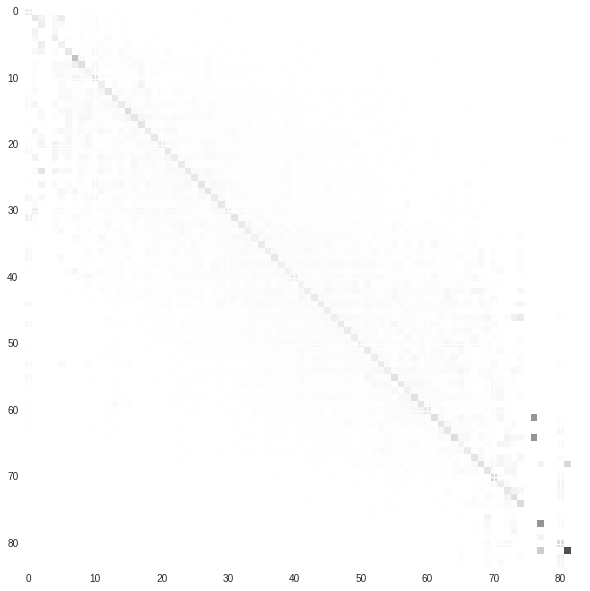

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(train_pitch_confmat / pitch_norm, vmin=0, vmax=1.0, 
          aspect='equal', interpolation='nearest')

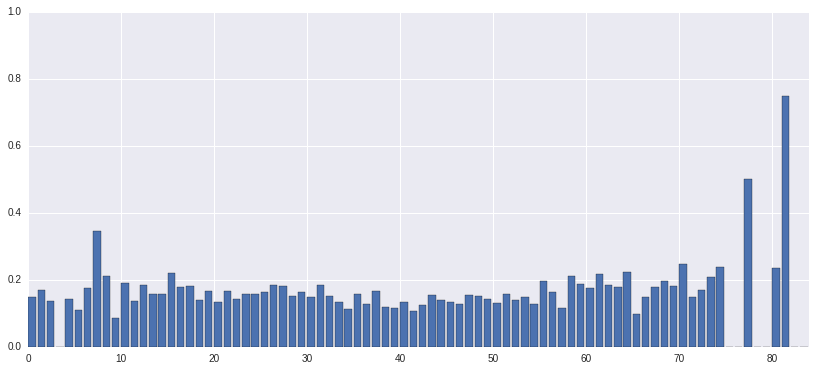

In [70]:
num_pitches = len(train_pitch_confmat)

fig, ax = plt.subplots(1, 1, figsize=(14, 6))
ax.bar(range(num_pitches), 
       (train_pitch_confmat / pitch_norm)[[range(num_pitches)]*2])
# ax.set_xticks(np.arange(len(knn_inst.classes_))+0.45)
# ax.set_xticklabels(knn_inst.classes_)
ax.set_ylim(0, 1)
ax.set_xlim(0, num_pitches);

In [46]:
# Instrument embedding
pitch_full = pd.read_json(
    "/media/ejhumphrey/workspace/icml-dml/embeddings/"
    "pitch-000-050000-20160611_21h02m48s/output_index.json")

In [17]:
def do_the_thing(dframe, train, valid, num_train, num_valid):
    num_inst_classes = len(train.instrument.unique())
    num_pitches = len(train.note_number.unique())
    
    x_train, y_train = D.sample_embeddings(dframe.loc[train.index], num_train)
    x_valid, y_valid = D.sample_embeddings(dframe.loc[valid.index], num_valid)
    
    knn_inst = N.KNeighborsClassifier(75).fit(x_train, y_train.instrument)
    print("Instrument!\nTrain: {:.4f}\tValid: {:.4f}".format(
        knn_inst.score(x_train, y_train.instrument),
        knn_inst.score(x_valid, y_valid.instrument)))
    
    inst_confmat = M.confusion_matrix(y_valid.instrument, knn_inst.predict(x_valid))
    inst_norm = 1.*inst_confmat.sum(axis=0, keepdims=True)
    inst_norm[inst_norm == 0] = 1.0

    fig, ax = plt.subplots(1, 1, figsize=(14, 4))
    ax.bar(range(num_inst_classes), 
           (inst_confmat / inst_norm)[[range(num_inst_classes)]*2])
    ax.set_xticks(np.arange(len(knn_inst.classes_))+0.45)
    ax.set_xticklabels(knn_inst.classes_)
    ax.set_ylim(0, 1)
    ax.set_xlim(0, num_inst_classes);
    ax.set_xlabel("Instrument Class")
    ax.set_ylabel("Accuracy")
    
    knn_pitch = N.KNeighborsClassifier(75).fit(x_train, y_train.note_number)
    print("Pitch!\nTrain: {:.4f}\tValid: {:.4f}".format(
            knn_pitch.score(x_train, y_train.note_number),
            knn_pitch.score(x_valid, y_valid.note_number)))
    
    pitch_confmat = M.confusion_matrix(y_valid.note_number, knn_pitch.predict(x_valid))
    pitch_norm = 1.*pitch_confmat.sum(axis=0, keepdims=True)
    pitch_norm[pitch_norm == 0] = 1.0

    num_pitches = pitch_confmat.shape[0]
#     print(pitch_confmat.shape)

    fig, ax = plt.subplots(1, 1, figsize=(14, 4))
    ax.bar(range(num_pitches), 
           (pitch_confmat / pitch_norm)[[range(num_pitches)]*2])
    ax.set_ylim(0, 1)
    ax.set_xlim(0, num_pitches);
    ax.set_xlabel("Pitch (semitones)")
    ax.set_ylabel("Accuracy")
    

Instrument!
Train: 0.4755	Valid: 0.4481
Pitch!
Train: 0.1444	Valid: 0.0760


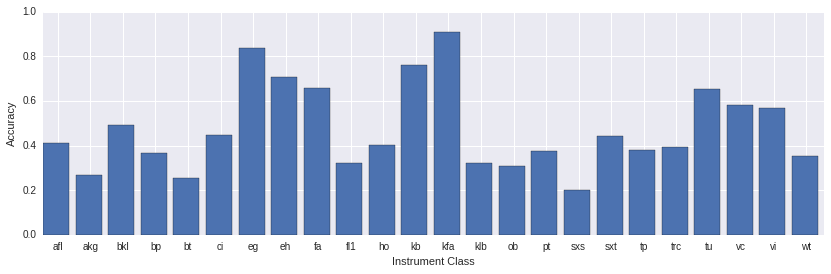

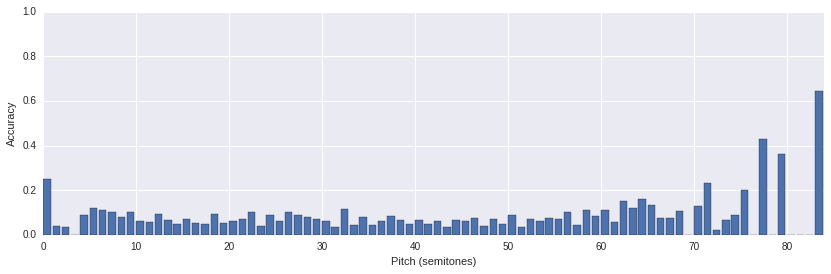

In [18]:
# Instrument embedding
inst_full = pd.read_json(
    "/media/ejhumphrey/workspace/icml-dml/embeddings/"
    "instrument-000-050000-20160611_18h21m39s/output_index.json")

do_the_thing(inst_full, train, test, 100000, 50000)

Instrument!
Train: 0.2567	Valid: 0.1812
Pitch!
Train: 0.6423	Valid: 0.6242


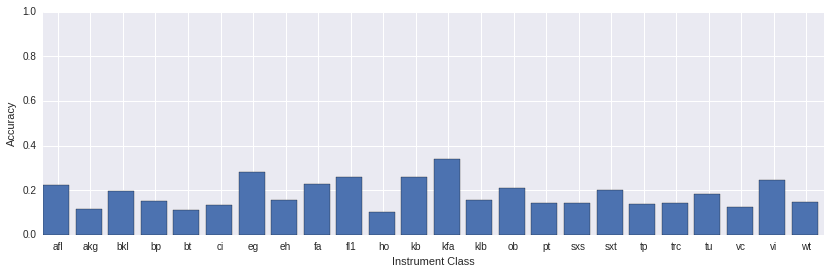

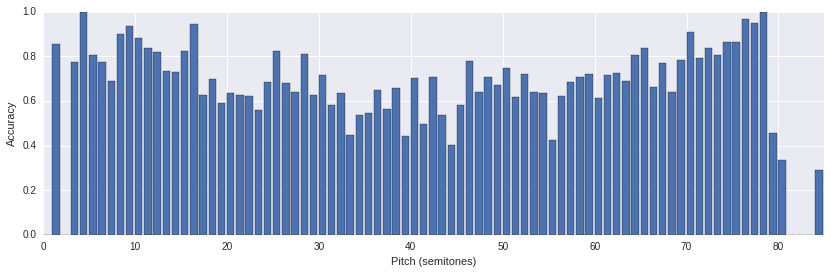

In [19]:
# Pitch embedding
pitch_full = pd.read_json(
    "/media/ejhumphrey/workspace/icml-dml/embeddings/"
    "pitch-000-050000-20160611_21h02m48s/output_index.json")

do_the_thing(pitch_full, train, test, 100000, 50000)

Instrument!
Train: 0.3484	Valid: 0.2876
Pitch!
Train: 0.6087	Valid: 0.5851


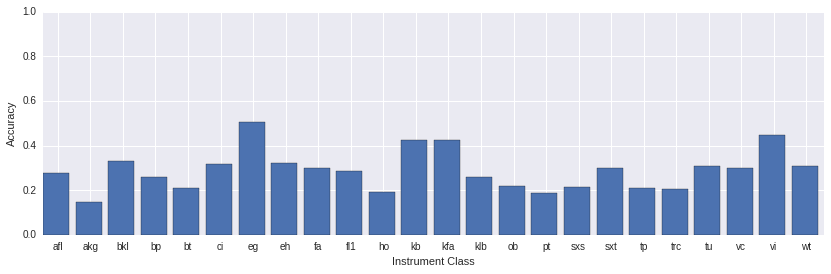

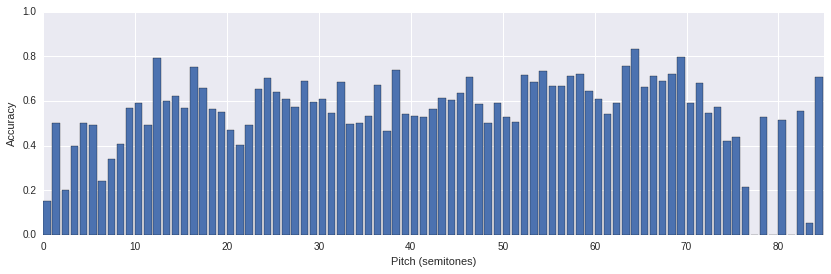

In [20]:
# Instrument-pitch embedding
instpitch_full = pd.read_json(
    "/media/ejhumphrey/workspace/icml-dml/embeddings/"
    "instpitch-000-050000-20160611_23h46m35s/output_index.json")

do_the_thing(instpitch_full, train, test, 100000, 50000)

Instrument!
Train: 0.4211	Valid: 0.3876
Pitch!
Train: 0.3920	Valid: 0.3469


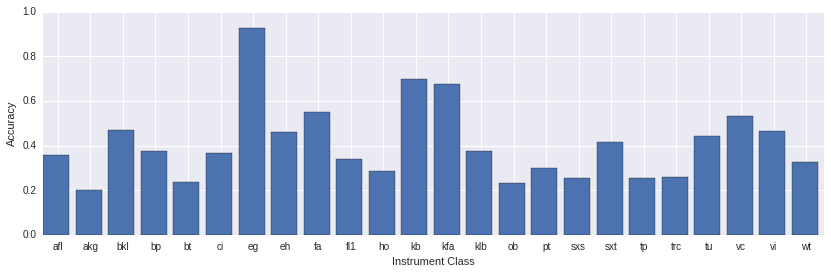

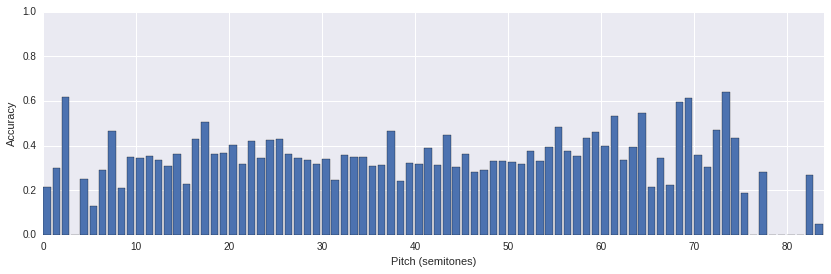

In [21]:
# Instrument-pitch-d2 embedding
instpitch_d2_full = pd.read_json(
    "/media/ejhumphrey/workspace/icml-dml/embeddings/"
    "instpitch-d2-000-050000-20160612_02h32m03s/output_index.json")

do_the_thing(instpitch_d2_full, train, test, 100000, 50000)

In [86]:
x_train, y_train = D.sample_embeddings(instpitch_full.loc[train.index], 100000)
x_test, y_test = D.sample_embeddings(instpitch_full.loc[test.index], 50000)

In [148]:
inst_classes = sorted(y_test.instrument.unique())
class_map = {k: n for n, k in enumerate(inst_classes)}
y_train['instrument_idx'] = [class_map[c] for c in y_train.instrument]
y_test['instrument_idx'] = [class_map[c] for c in y_test.instrument]

In [105]:
x_vectors = []
for n in range(10000):
    vi_idx = random.choice(y_test[(y_test.instrument == 'trc') & (y_test.note_number == 48)].index)
    vc_idx = random.choice(y_test[(y_test.instrument == 'ho') & (y_test.note_number == 48)].index)
    trc_idx = random.choice(y_test[(y_test.instrument == 'klb') & (y_test.note_number == 48)].index)
    x_vectors.append(x_test[vc_idx] - x_test[vi_idx] + x_test[trc_idx])

In [152]:
knn = N.KNeighborsClassifier(75).fit(x_train, y_train.instrument_idx)

In [157]:
x_vectors = []
for n in range(10000):
    a1_idx = random.choice(y_test[(y_test.instrument_idx == class_map['sxt'])].index)
    a0_idx = random.choice(y_test[(y_test.instrument_idx == class_map['sxs'])].index)
    b0_idx = random.choice(y_test[(y_test.instrument_idx == class_map['ho'])].index)
    x_vectors.append(x_test[a1_idx] - x_test[a0_idx] + x_test[b0_idx])

counts = np.bincount(knn.predict(np.asarray(x_vectors)).astype(np.int32))
idx = counts.argsort()[:-6:-1]
print(counts[idx], np.array(inst_classes)[idx])

(array([1313, 1106,  816,  767,  762]), array([u'ho', u'bp', u'tp', u'kb', u'bt'], 
      dtype='<U3'))


In [158]:
# bp -- bass trombone
# tp -- tenor trombone
# kb -- bass
# bt -- bass trumpet

In [167]:
x_vectors = []
for n in range(10000):
    a1_idx = random.choice(y_test[(y_test.instrument_idx == class_map['sxt'])].index)
    a0_idx = random.choice(y_test[(y_test.instrument_idx == class_map['vc'])].index)
    b0_idx = random.choice(y_test[(y_test.instrument_idx == class_map['vi'])].index)
    x_vectors.append(x_test[a1_idx] - x_test[a0_idx] + x_test[b0_idx])

counts = np.bincount(knn.predict(np.asarray(x_vectors)).astype(np.int32))
idx = counts.argsort()[:-6:-1]
print(counts[idx], np.array(inst_classes)[idx])

(array([1011,  947,  818,  746,  685]), array([u'pt', u'eg', u'vi', u'ob', u'vc'], 
      dtype='<U3'))


In [ ]:
#
#
#

In [156]:
counts = np.bincount(knn.predict(np.asarray(x_vectors)).astype(np.int32))
idx = counts.argsort()[:-6:-1]
print(counts[idx], np.array(inst_classes)[idx])

(array([1332, 1078,  861,  844,  747]), array([u'ho', u'bp', u'tp', u'bt', u'kb'], 
      dtype='<U3'))


In [130]:
knn = N.KNeighborsClassifier(75).fit(x_train, y_train.note_number)

In [171]:
x_vectors = []
for n in range(10000):
    a1_idx = random.choice(y_test[(y_test.note_number == 60) & (y_test.instrument_idx == class_map['ho'])].index)
    a0_idx = random.choice(y_test[(y_test.note_number == 55) & (y_test.instrument_idx == class_map['ho'])].index)
    b0_idx = random.choice(y_test[(y_test.note_number == 40) & (y_test.instrument_idx == class_map['ho'])].index)
    x_vectors.append(x_test[a1_idx] - x_test[a0_idx] + x_test[b0_idx])

counts = np.bincount(knn.predict(np.asarray(x_vectors)).astype(np.int32))
idx = counts.argsort()[:-6:-1]
print(counts[idx], idx)

(array([3397, 2471, 1214,  723,  443]), array([20, 11, 12,  4, 23]))
